In [34]:
%%capture
! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import pandas as pd
import numpy as np
path='data/dftRoadSafetyData_Accidents_2018.csv'
df = pd.read_csv(path)
df.shape

In [35]:
df.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

In [36]:
df.drop(['Number_of_Casualties','Speed_limit', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Number_of_Vehicles', 'Time', 'Junction_Detail', 'Junction_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Pedestrian_Crossing-Human_Control', 'LSOA_of_Accident_Location', 'Date', 'Accident_Index', 'Local_Authority_(District)', 'Local_Authority_(Highway)', '2nd_Road_Class', '2nd_Road_Number', 'Police_Force', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Accident_Index', '1st_Road_Number', '1st_Road_Class'], axis=1, inplace=True)
RTD1=df[df['Road_Type']==-1].index
df.drop(RTD1 , inplace=True)
RTD2=df[df['Road_Type']==9].index
df.drop(RTD2 , inplace=True)
LCD=df[df['Light_Conditions']==-1].index
df.drop(LCD , inplace=True)
WCD1=df[df['Weather_Conditions']==9].index
df.drop(WCD1 , inplace=True)
WCD2=df[df['Weather_Conditions']==-1].index
df.drop(WCD2 , inplace=True)
RSCC=df[df['Road_Surface_Conditions']==-1].index
df.drop(RSCC , inplace=True)
URD1=df[df['Urban_or_Rural_Area']==3].index
df.drop(URD1 , inplace=True)
URD2=df[df['Urban_or_Rural_Area']==-1].index
df.drop(URD2 , inplace=True)


In [51]:
df.head()
df['Urban_or_Rural_Area'].value_counts()

1    78059
2    38747
Name: Urban_or_Rural_Area, dtype: int64

In [52]:
df.loc[(df.Weather_Conditions == 4),'Weather_Conditions']=1
df.loc[(df.Weather_Conditions == 5),'Weather_Conditions']=2
df.loc[(df.Weather_Conditions == 6),'Weather_Conditions']=3
df.loc[(df.Weather_Conditions == 8),'Weather_Conditions']=7
df.loc[(df.Weather_Conditions == 1),'Weather_Conditions']="W_Fine"
df.loc[(df.Weather_Conditions == 2),'Weather_Conditions']="W_Rain"
df.loc[(df.Weather_Conditions == 3),'Weather_Conditions']="W_Snow"
df.loc[(df.Weather_Conditions == 7),'Weather_Conditions']="Fog"

df.loc[(df.Light_Conditions == 6),'Light_Conditions']=5
df.loc[(df.Light_Conditions == 7),'Light_Conditions']=5
df.loc[(df.Light_Conditions == 1),'Light_Conditions']="Daylight"
df.loc[(df.Light_Conditions == 4),'Light_Conditions']="Dark-lit"
df.loc[(df.Light_Conditions == 5),'Light_Conditions']="Dark-unlit"

df.loc[(df.Road_Surface_Conditions == 1),'Road_Surface_Conditions']="R_Dry"
df.loc[(df.Road_Surface_Conditions == 2),'Road_Surface_Conditions']="R_Wet"
df.loc[(df.Road_Surface_Conditions == 3),'Road_Surface_Conditions']="R_Snow"
df.loc[(df.Road_Surface_Conditions == 4),'Road_Surface_Conditions']="R_Ice"
df.loc[(df.Road_Surface_Conditions == 5),'Road_Surface_Conditions']="R_Flood"

df.loc[(df.Day_of_Week == 1),'Day_of_Week']="Sunday"
df.loc[(df.Day_of_Week == 2),'Day_of_Week']="Monday"
df.loc[(df.Day_of_Week == 3),'Day_of_Week']="Tuesday"
df.loc[(df.Day_of_Week == 4),'Day_of_Week']="Wednesday"
df.loc[(df.Day_of_Week == 5),'Day_of_Week']="Thursday"
df.loc[(df.Day_of_Week == 6),'Day_of_Week']="Friday"
df.loc[(df.Day_of_Week == 7),'Day_of_Week']="Saturday"

df.loc[(df.Road_Type == 1),'Road_Type']="Roundabout"
df.loc[(df.Road_Type == 2),'Road_Type']="One-way"
df.loc[(df.Road_Type == 3),'Road_Type']="Single C"
df.loc[(df.Road_Type == 7),'Road_Type']="Double C"
df.loc[(df.Road_Type == 6),'Road_Type']="Slip_road"

df.loc[(df.Urban_or_Rural_Area == 1),'Urban_or_Rural_Area']="Urban"
df.loc[(df.Urban_or_Rural_Area == 2),'Urban_or_Rural_Area']="Rural"

#df['Light_Conditions'].value_counts()
df_gptest1 = df[['Light_Conditions','Weather_Conditions','Accident_Severity']]
grouped_test1 = df_gptest1.groupby(['Weather_Conditions','Light_Conditions'],as_index=False).mean()
grouped_pivot1 = grouped_test1.pivot(index='Weather_Conditions',columns='Light_Conditions')
grouped_pivot1

Accident_Severity                     
Light_Conditions            Dark-lit Dark-unlit  Daylight
Weather_Conditions                                       
Fog                         2.786445   2.736052  2.840248
W_Fine                      2.767065   2.668740  2.788240
W_Rain                      2.775381   2.715286  2.815121
W_Snow                      2.859327   2.756757  2.837389

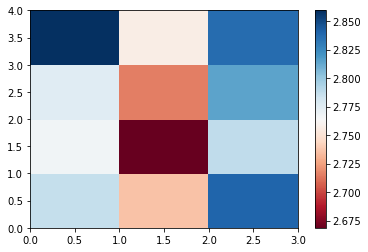

In [43]:
plt.pcolor(grouped_pivot1, cmap='RdBu')
plt.colorbar()
plt.show()

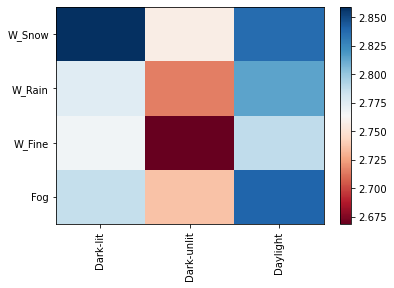

In [44]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot1, cmap='RdBu')

#label names
row_labels = grouped_pivot1.columns.levels[1]
col_labels = grouped_pivot1.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot1.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot1.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [47]:
df_gptest2 = df[['Day_of_Week','Road_Surface_Conditions','Accident_Severity']]
grouped_test2 = df_gptest2.groupby(['Day_of_Week','Road_Surface_Conditions'],as_index=False).mean()
grouped_pivot2 = grouped_test2.pivot(index='Day_of_Week',columns='Road_Surface_Conditions')
grouped_pivot2

Accident_Severity                                \
Road_Surface_Conditions             R_Dry   R_Flood     R_Ice    R_Snow   
Day_of_Week                                                               
Friday                           2.787792  2.571429  2.831832  2.886525   
Monday                           2.790228  2.888889  2.815166  2.861538   
Saturday                         2.755012  2.818182  2.798507  2.818898   
Sunday                           2.743983  2.750000  2.847953  2.869822   
Thursday                         2.790027  2.857143  2.849711  2.820809   
Tuesday                          2.791565  2.772727  2.789773  2.812207   
Wednesday                        2.788646  2.850000  2.831522  2.844920   

                                   
Road_Surface_Conditions     R_Wet  
Day_of_Week                        
Friday                   2.779499  
Monday                   2.766923  
Saturday                 2.765411  
Sunday                   2.750304  
Thursday                 2.785063  
Tuesday                  2.771204  
Wednesday                2.789302

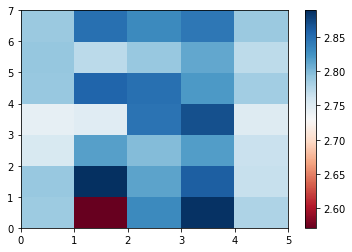

In [48]:
plt.pcolor(grouped_pivot2, cmap='RdBu')
plt.colorbar()
plt.show()

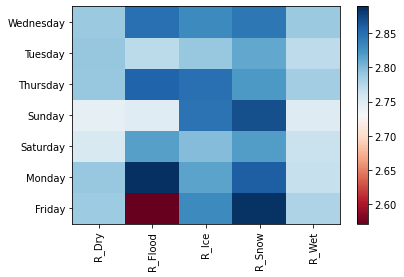

In [49]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot2, cmap='RdBu')

#label names
row_labels = grouped_pivot2.columns.levels[1]
col_labels = grouped_pivot2.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot2.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot2.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

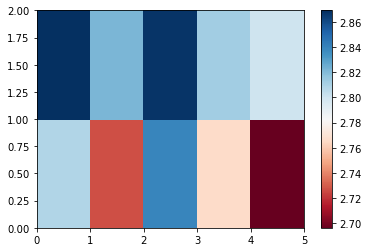

In [54]:
df_gptest3 = df[['Urban_or_Rural_Area','Road_Type','Accident_Severity']]
grouped_test3 = df_gptest3.groupby(['Urban_or_Rural_Area','Road_Type'],as_index=False).mean()
grouped_pivot3 = grouped_test3.pivot(index='Urban_or_Rural_Area',columns='Road_Type')
plt.pcolor(grouped_pivot3, cmap='RdBu')
plt.colorbar()
plt.show()

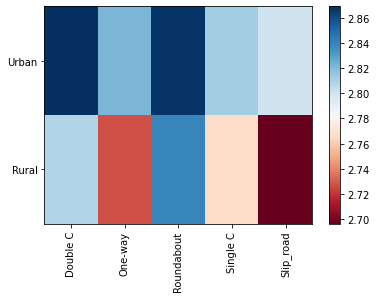

In [56]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot3, cmap='RdBu')

#label names
row_labels = grouped_pivot3.columns.levels[1]
col_labels = grouped_pivot3.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot3.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot3.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<AxesSubplot:xlabel='Weather_Conditions', ylabel='Accident_Severity'>

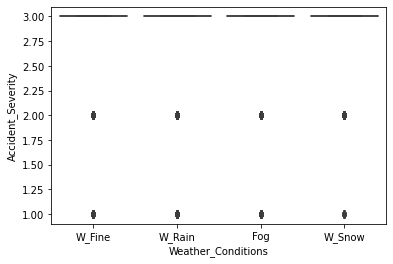

In [58]:
sns.boxplot(x="Weather_Conditions", y="Accident_Severity", data=df)